# Inroduction to PyTorch

In [1]:
%reset -f

#test

In [2]:
import os
print(os.getcwd())
import torch
import numpy as np
print(torch.__version__)

/Users/samdavanloo/Library/Mobile Documents/com~apple~CloudDocs/MyGitHub/ISE-ML
1.10.2


In [3]:
a = [1, 2, 3] # from list
b = np.array([4, 5, 6], dtype=np.int32) #from np.ndarray

t_a = torch.tensor(a)  # tensor data structure
t_b = torch.from_numpy(b)

print(type(a))
print(type(b))
print(t_a)
print(t_b)
type(t_a)

<class 'list'>
<class 'numpy.ndarray'>
tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


torch.Tensor

In [3]:
print(torch.is_tensor(a)), print(torch.is_tensor(t_a))

t_ones = torch.ones(2, 3)
print(t_ones.shape)

rand_tensor = torch.rand(2,3)
print(rand_tensor)


t_a_new = t_a.to(torch.int64)
print(type(t_a_new)) # type of t_a_new
print(t_a_new.dtype) # type of inside data

False
True
torch.Size([2, 3])
tensor([[0.7330, 0.9139, 0.8926],
        [0.4056, 0.3128, 0.3333]])
<class 'torch.Tensor'>
torch.int64


### Manipulating data type and shape

In [4]:
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0, 1)
print(t.shape, ' --> ', t_tr.shape)

t = torch.zeros(30)
t_reshape = t.reshape(5, 6)
print(t_reshape.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])
torch.Size([5, 6])


### Applying mathematical operations to tensors

In [5]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))
t3 = torch.multiply(t1, t2) #elementwise multiplication
print(t3)

t4 = torch.mean(t1, axis=0) #mean of the rows
print(t4)

t5 = torch.matmul(t1, torch.transpose(t2, 0, 1)) #matrix multiplication (t1*t2^T)
print(t5)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])
tensor([-0.1373,  0.2028])
tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [6]:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1) #calculating p(=2)-norm across axis-1 (columns) 
print(t1.shape)
print(norm_t1)

torch.Size([5, 2])
tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


### Split, stack, and concatenate tensors

In [7]:
torch.manual_seed(1)
t = torch.rand(6)
print(t)
t_splits = torch.chunk(t, 3)
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.7576316 , 0.27931088], dtype=float32),
 array([0.40306926, 0.73468447], dtype=float32),
 array([0.02928156, 0.7998586 ], dtype=float32)]

In [8]:
torch.manual_seed(1)
t = torch.rand(5)
print(t)
t_splits = torch.split(t, split_size_or_sections=[3, 2])
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.7576316 , 0.27931088, 0.40306926], dtype=float32),
 array([0.73468447, 0.02928156], dtype=float32)]

In [9]:
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [10]:
A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A, B], axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


## Building input pipelines in PyTorch
In cases when the traing dataset is rather small and can be loaded as a tensor into the memory, we can directly use this tensor for training. Otherwise, when the dataset is too large to fit into the computer memory, we need to load the data from the main storage device in bacthes. In addition, we may need to construct a data-processing pipeline to apply certain transformations and preprocessing steps to our data, such as mean centering, scaling, or adding noise to augment the training procedure and to prevent overfitting. PyTorch provides a special class for constructing efficient and convenient preprocessing pipelines.


If the data already exists in the form of a tensor object, a Python list, or a NumPy array, we can easily create a dataset loader using the "torch.utils.data.DataLoader()" class. 

In [4]:
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)
for item in data_loader:
    print(item)



tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


If we want to create batches from this dataset, with a desired batch size of 3, we can do this with the "batch_size" argument as follows:

In [5]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):  #"enumerate" returns both elements and their indices
    print(f'batch {i}:', batch) #check f-string

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


### Combining two tensors into a joint dataset

In [6]:
from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

torch.manual_seed(1)

t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)
joint_dataset = JointDataset(t_x, t_y)

for example in joint_dataset:
    print('  x: ', example[0], 
          '  y: ', example[1])

# Or use TensorDataset directly 
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


### Shuffle, batch, and repeat


In [ ]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])
        
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])

### Creating a dataset from files on your local storage disk

First, we use "pathlib" library to generate a list of image files.

In [7]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images') #'cat_dog_images' is the name of directory

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


Next, we visualize these images using "matplotlib".

Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


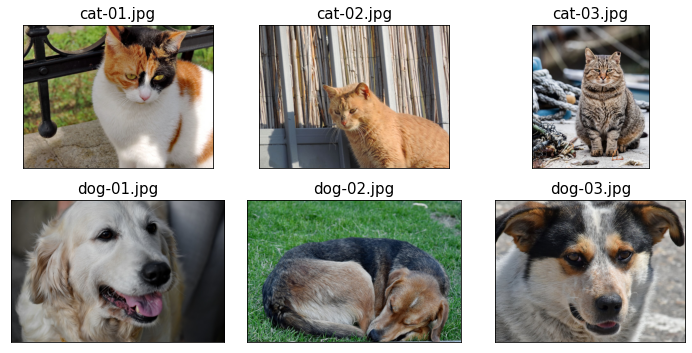

In [8]:
import matplotlib.pyplot as plt
import os
from PIL import Image


fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
#plt.savefig('figures/12_03.pdf')
plt.tight_layout()
plt.show()

Labels for these images are provided within their file names. So, we extarct these labels from the list of filenames, assign 1 to dogs and 0 to cats.

In [9]:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


Now, we have two lists: a list of filenames (or paths of each image) and a list of their labels. In the previous section, you learned how to create a joint dataset from two arrays. Here, we create a joint dataset that has filenames and labels:

In [10]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]      
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

cat_dog_images/cat-01.jpg 0
cat_dog_images/cat-02.jpg 0
cat_dog_images/cat-03.jpg 0
cat_dog_images/dog-01.jpg 1
cat_dog_images/dog-02.jpg 1
cat_dog_images/dog-03.jpg 1


Next, we need to apply transformations to this dataset: load the image content from its file path, decode the raw content, and resize it to a desired size, for example, 80×120.

In [ ]:
import torchvision.transforms as transforms

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])        
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)

img_height, img_width = 80, 120
    
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])
    
image_dataset = ImageDataset(file_list, labels, transform)

Finally, we visualize these transformed image examples using Matplotlib: 

In [ ]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)
    
plt.tight_layout()
plt.savefig('figures/12_04.pdf')
plt.show()

### Fetching available datasets from the torchvision.datasets library

The "torchvision.datasets" library provides a nice collection of freely available image datasets for training or evaluating deep learning models. Similarly, the "torchtext.datasets" library provides datasets for natural language. You can take a look at the list of available datasets at https://pytorch.org/vision/stable/datasets.html.

In [1]:
os.getcwd()

'/Users/samdavanloo/Library/Mobile Documents/com~apple~CloudDocs/MyGitHub/ISE-ML'

Next, we will call the "torchvision.datasets.CelebA" class to download the data, store it on disk in a designated folder, and load it into a "torch.utils.data.Dataset" object:

In [3]:
import torch
import torchvision
image_path = './'
celeba_dataset = torchvision.datasets.CelebA(image_path, split='train', target_type='attr', download=False)

assert isinstance(celeba_dataset, torch.utils.data.Dataset) #control

In order to see what the data example look like:

In [4]:
example = next(iter(celeba_dataset))
print(example)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7FB9B942F0D0>, tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))


Note that the sample in this dataset comes in a tuple of (PIL.Image, attributes). If we want to pass this dataset to a supervised deep learning model during training, we have to reformat it as a tuple of (features tensor, label). For the label, we will use the 'Smiling' category from the attributes as an example, which is the 31st element.

Finally, let’s take the first 18 examples from it to visualize them with their 'Smiling' labels: 

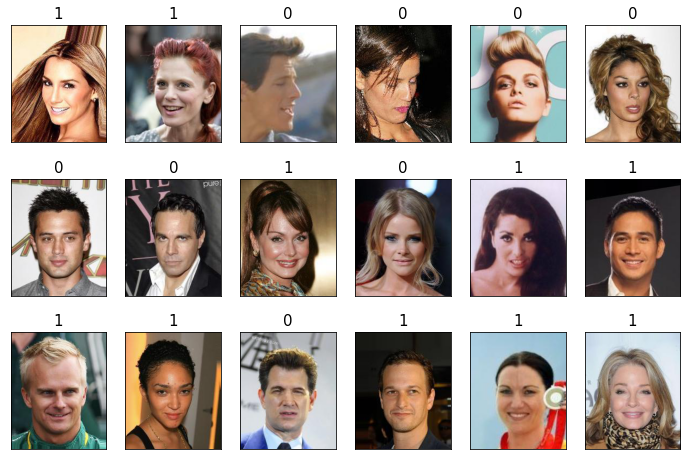

In [6]:
import matplotlib.pyplot as plt
from itertools import islice
fig = plt.figure(figsize=(12, 8))
for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):  # 18 replaces stop
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size=15)
    
#plt.savefig('figures/12_05.pdf')
plt.show()

In [7]:
print(celeba_dataset.__len__)

<bound method CelebA.__len__ of Dataset CelebA
    Number of datapoints: 162770
    Root location: ./
    Target type: ['attr']
    Split: train>


Next, we will proceed with the second dataset from "torchvision.datasets.MNIST":

(<PIL.Image.Image image mode=L size=28x28 at 0x7FB975BB3EB0>, 5)


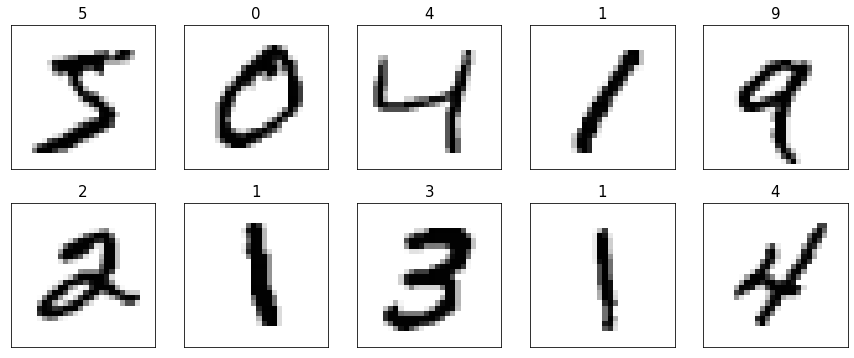

In [8]:
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=False)

assert isinstance(mnist_dataset, torch.utils.data.Dataset)

example = next(iter(mnist_dataset))
print(example)

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

#plt.savefig('figures/12_06.pdf')
plt.show()